In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
momemta_out = '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights1.csv'
observations_local = '/scratch/madminer_data/data/miner_lhe_data_shuffled.h5'
observations = h5py.File(observations_local, mode='r')
print observations['benchmarks']['values'][:]
print type(observations['benchmarks']['values'][0][0])
print observations['benchmarks']['values'][:].shape

[[-5.        ]
 [-4.7349485 ]
 [-4.469897  ]
 [-4.2048455 ]
 [-3.939794  ]
 [-3.6747425 ]
 [-3.409691  ]
 [-3.1446395 ]
 [-2.879588  ]
 [-2.6145365 ]
 [-2.349485  ]
 [-2.0844335 ]
 [-1.819382  ]
 [-1.5543305 ]
 [-1.289279  ]
 [-1.0242275 ]
 [-0.759176  ]
 [-0.4941245 ]
 [-0.229073  ]
 [ 0.0359785 ]
 [ 0.30103   ]
 [ 0.        ]
 [-2.39794001]]
<type 'numpy.float64'>
(23, 1)


In [2]:
momemta_results = np.genfromtxt(momemta_out, delimiter=",", autostrip=True)
print momemta_results[0,:-1] 
widths = momemta_results[0,:-1]
ratios = momemta_results[1:,:-1]

[1.00000e-05 3.38925e-05 1.14870e-04 3.89322e-04 1.31951e-03 4.47214e-03
 1.51572e-02 5.13714e-02 1.74110e-01 5.90102e-01 2.00000e+00]


In [3]:
print widths

[1.00000e-05 3.38925e-05 1.14870e-04 3.89322e-04 1.31951e-03 4.47214e-03
 1.51572e-02 5.13714e-02 1.74110e-01 5.90102e-01 2.00000e+00]


In [4]:
ratios.shape

(300, 11)

In [5]:
theta0_cross_sections =  [2.61619795e+01, 1.55512765e+01, 9.58008506e+00, 6.04835670e+00,
 3.81019319e+00, 2.31626888e+00, 1.32175315e+00, 6.95138311e-01,
 3.36863812e-01, 1.56658100e-01, 7.40323636e-02, 3.63797596e-02,
 1.84847024e-02, 9.59716209e-03, 5.04793137e-03, 2.67726599e-03,
 1.42750882e-03, 7.62102832e-04, 4.04687115e-04, 2.11762178e-04,
 1.07273984e-04,]
sampled_cross_sections = theta0_cross_sections[::2]
ref_cross_section = theta0_cross_sections[10]
ref_cross_section = 0.000218
print(sampled_cross_sections, ref_cross_section)

([26.1619795, 9.58008506, 3.81019319, 1.32175315, 0.336863812, 0.0740323636, 0.0184847024, 0.00504793137, 0.00142750882, 0.000404687115, 0.000107273984], 0.000218)


In [6]:
average_ratios = np.mean(ratios, axis=0)
average_ratios

array([2.70442044e+07, 8.16793192e+06, 2.49448025e+06, 6.33976403e+05,
       1.31079523e+05, 2.42569423e+04, 3.34855770e+03, 3.50352221e+02,
       3.22560019e+01, 2.85898417e+00, 2.52310650e-01])

In [7]:
widths

array([1.00000e-05, 3.38925e-05, 1.14870e-04, 3.89322e-04, 1.31951e-03,
       4.47214e-03, 1.51572e-02, 5.13714e-02, 1.74110e-01, 5.90102e-01,
       2.00000e+00])

In [8]:
normalized_ratios = average_ratios/sampled_cross_sections * ref_cross_section

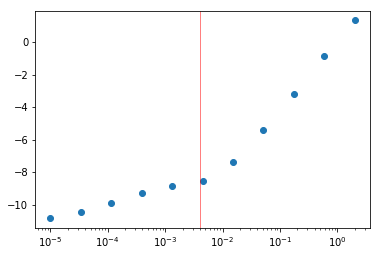

In [9]:
plt.plot(widths, -2*np.log(normalized_ratios), 'o')
plt.axvline(x=4E-3, color='red', linewidth=0.5) # expected global minimum
plt.xscale('log')